In [1]:
# Import libraries
import glob
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from scipy.stats import bootstrap

# 1. Time Series Classification Part 1: Feature Creation/Extraction
An interesting task in machine learning is classification of time series. In this problem, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network.

## (a) Download the AReM data
from: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+(AReM) 

The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity.1 Each file containis 6 time series collected from activities of the same person, which are called avg rss12, var rss12, avg rss13, var rss13, vg rss23, and ar rss23. There are 88 instances in the dataset, each of which con- tains 6 time series and each time series has 480 consecutive values.

I notice that dataset4.csv in bending2 folder is not the standard form of a csv file. I format that file by replacing space with comma in Sublime Text. Additioanlly, there are additional comma for `dataset9.csv` and `dataset14.csv` in the cycling folder. I manually remove them according to [this post](https://piazza.com/class/l7149q4oxue34e/post/455) on Piazza.

## (b)
Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [2]:
# Define a function to split testing and training data within a folder
def data_split(FolderName, num_data_set, num_test_set):
    # Make testing dataset
    test_set = list()
    for i in range(1, num_test_set+1):
        path = '../data/ARem/' + FolderName + '/dataset' + str(i) + '.csv'
        df_test = pd.read_csv(path, skiprows = 4)  # Skip first 4 rows of information
        test_set.append(df_test)
    test_frame = pd.concat(test_set, ignore_index=True)
    
    # Make trainig dataset
    train_set = list()
    for j in range(num_test_set+1, num_data_set+1):
        path = '../data/ARem/' + FolderName + '/dataset' + str(j) + '.csv'
        df_train = pd.read_csv(path, skiprows = 4)  # Skip first 4 rows of information
        train_set.append(df_train)
    train_frame = pd.concat(train_set, ignore_index=True)
    
    return test_frame, train_frame


In [3]:
# Generate testing and training data from ARem folder
# Initialize list to store information
arem_testing = list()
arem_training = list()

# Deal with bending data first
bending = ["bending1", "bending2"]
arem_testing.append(data_split("bending1", 7, 2)[0])
arem_training.append(data_split("bending1", 7, 2)[1])
arem_testing.append(data_split("bending2", 6, 2)[0])
arem_training.append(data_split("bending2", 6, 2)[1])
    
# Deal with other data
other = ["cycling", "lying", "sitting", "standing", "walking"]
for folder in other:
    arem_testing.append(data_split(folder, 15, 3)[0])
    arem_training.append(data_split(folder, 15, 3)[1])
      
# Concatenate into testing and training dataframe
AREM_test = pd.concat(arem_testing, ignore_index=True)
AREM_train = pd.concat(arem_training, ignore_index=True)

In [4]:
# Check the dimensions
print("Testing set shape:", AREM_test.shape)
print("Training set shape:", AREM_train.shape)

Testing set shape: (9120, 7)
Training set shape: (33119, 7)


## (c) Feature Extraction
Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.

### i. 
Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

According to the information [here](https://stats.stackexchange.com/questions/50807/features-for-time-series-classification#:~:text=Usually%20the%20features%20used%20to,than%20being%20features%20in%20themselves.), the following features can be used in the time series classification.

**Statistical features**
1. Mean
2. Standard devition
3. Skewness, Kurtosis
4. Maximum and Minimum values

**Time series features**
1. Cross-Correlations between each dimension and the Auto-Correlations
2. Orders of the autoregressive (AR), integrated (I) and moving average (MA) part of an estimated ARIMA model
3. Parameters of the AR part
3. Parameters of the MA part

### ii.
Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [5]:
# Define a function to extract time-domain features for 6 time series in each instance
# Features: minimum, maximum, mean, median, standard deviation, first quartile, and third quartile

def feature_extraction(FolderName, num_csv):
    # Define path to locate csv files
    all_csv = list()
    for i in range(1, num_csv+1):
        path = '../data/ARem/' + FolderName + "/dataset" + str(i) +".csv"
        all_csv.append(path)
    
    # Set up variable to count number of instance
    global instance_cnt
    # Store extracted features
    extraction = list()
    
    # Iterate through csv files and read as dataframe
    for filename in all_csv:
        df = pd.read_csv(filename, skiprows=4)
        temp = [instance_cnt]
        # Extract information from each dataframe
        for series_name in series:
            # Extract feature information 
            for feature in features:
                temp.append(df.describe()[series_name][feature])
        
        extraction.append(temp)
        instance_cnt += 1
    return extraction


In [6]:
# Set serie names
series = ["avg_rss12", "var_rss12", "avg_rss13", "var_rss13", "avg_rss23", "var_rss23"]
series_formatname = [i for i in range(1, 7)]
# Set feature names to be extracted
features = ['min', 'max', 'mean', '50%', 'std', '25%', '75%']
features_formatname = ['min', 'max', 'mean', 'median', 'std dev', '1st quart', '3rd quart']

# Initialize counting and list to store information
instance_cnt = 1
extracted_features = list()

# Iterate through csv in bending1 folder
extracted_features.extend(feature_extraction("bending1", 7))
# Iterate through csv in bending1 folder
extracted_features.extend(feature_extraction("bending2", 6))
# Iterate through other folders in ARem
for folder_name in other:
    extracted_features.extend(feature_extraction(folder_name, 15))

In [7]:
# Format column names for table
col = ['Instance']
for series_name in series_formatname:
    for feature in features_formatname:
        col.append(feature + "_" + str(series_name))
        
# Convert extracted information into dataframe
df_feature = pd.DataFrame(extracted_features, columns=col)
display(df_feature)

,Instance,min_1,max_1,mean_1,median_1,std dev_1,1st quart_1,3rd quart_1,min_2,max_2,...,std dev_5,1st quart_5,3rd quart_5,min_6,max_6,mean_6,median_6,std dev_6,1st quart_6,3rd quart_6
0,1,37.25,45.00,40.624792,40.50,1.476967,39.25,42.0000,0.0,1.30,...,2.188449,33.0000,36.00,0.00,1.92,0.570583,0.43,0.582915,0.0000,1.3000
1,2,38.00,45.67,42.812812,42.50,1.435550,42.00,43.6700,0.0,1.22,...,1.995255,32.0000,34.50,0.00,3.11,0.571083,0.43,0.601010,0.0000,1.3000
2,3,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,...,1.999604,35.3625,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400
3,4,33.00,47.75,42.179813,43.50,3.670666,39.15,45.0000,0.0,3.00,...,3.849448,30.4575,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000
4,5,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,...,2.411026,28.4575,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,...,3.283983,13.7300,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225
84,85,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,...,3.119856,13.5000,17.75,0.00,9.67,3.432562,3.20,1.732727,2.1575,4.5650
85,86,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,...,2.823124,14.0000,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350
86,87,23.50,46.25,34.873229,35.25,4.531720,31.75,38.2500,0.0,14.82,...,3.131076,13.7500,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000


### iii.
Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python's bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [8]:
# Drop the instnace row since it is trivial
df_feature_est = df_feature.loc[:, df_feature.columns!="Instance"]
col_est = col[1:]

# Estimate the standard deviation for each feature
df_std = df_feature_est.std()
display(df_std)

min_1          9.569975
max_1          4.394362
mean_1         5.335718
median_1       5.440054
std dev_1      1.772153
1st quart_1    6.153590
3rd quart_1    5.138925
min_2          0.000000
max_2          5.062729
mean_2         1.574164
median_2       1.412244
std dev_2      0.884105
1st quart_2    0.946386
3rd quart_2    2.125266
min_3          2.956462
max_3          4.875137
mean_3         4.008380
median_3       4.036396
std dev_3      0.946710
1st quart_3    4.220658
3rd quart_3    4.171628
min_4          0.000000
max_4          2.183625
mean_4         1.166114
median_4       1.145586
std dev_4      0.458242
1st quart_4    0.843620
3rd quart_4    1.552504
min_5          6.124001
max_5          5.741238
mean_5         5.675593
median_5       5.813782
std dev_5      1.024898
1st quart_5    6.096465
3rd quart_5    5.531720
min_6          0.045838
max_6          2.518921
mean_6         1.154812
median_6       1.086474
std dev_6      0.517617
1st quart_6    0.758584
3rd quart_6    1

The standard deviation of each of the time-domain features we extracted are list above. We can observe that features like mean, median, and the stand deviation have relatively low standard deviation.

Let's implement the bootstrap on featurs we extracted.

In [9]:
# Fill nan value
# df_feature_fill = df_feature_est.fillna(0)

# After formatting dataset4 of bending2, we don't need to fill NaN value
df_feature_fill = df_feature_est 

# Convert to sequence
data = (df_feature_fill, )
# Calculate 90% bootstrap confidence interval
res = bootstrap(data, np.std, confidence_level=0.9, method='basic')
# Store result
CI = list()
for i in range(0, len(col_est)):
    CI.append([col_est[i], res.confidence_interval[0][i], res.confidence_interval[1][i]])
    
# Display result
df_CI = pd.DataFrame(CI, columns=["Feature", "Lower bound", "Upper bound"])
display(df_CI)

,Feature,Lower bound,Upper bound
0,min_1,8.325455,10.805682
1,max_1,3.486436,5.427224
2,mean_1,4.763277,5.912541
3,median_1,4.854032,6.038431
4,std dev_1,1.580582,1.965613
5,1st quart_1,5.623661,6.681270
6,3rd quart_1,4.412332,5.906443
7,min_2,0.000000,0.000000
8,max_2,4.691007,5.460132
9,mean_2,1.432454,1.742340


It seems like displaying the table is a little bit hard for us to decide important features that we should pick. We will then plot the confidence interval to assist us.

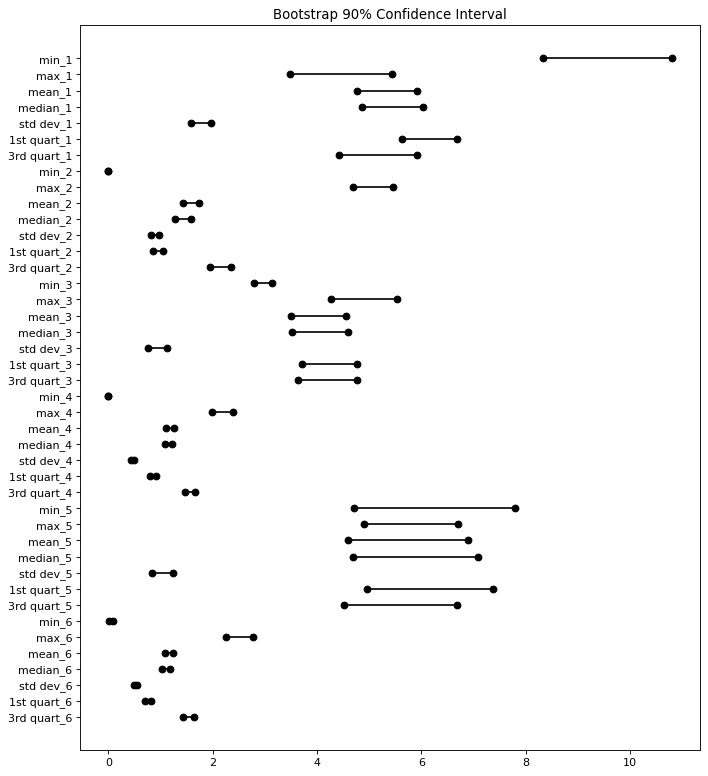

In [10]:
# Plot confidence interval result
plt.figure(figsize=(10, 12), dpi=80)
for i in range(0, len(col_est)):
    plt.plot((res.confidence_interval[0][i], res.confidence_interval[1][i]),
             (i, i),
             'o-',
             color='black')
plt.title("Bootstrap 90% Confidence Interval")
plt.yticks(range(0, len(col_est)), col_est)
plt.gca().invert_yaxis()
plt.show()

### iv.
Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

I would like to choose mean, median, and standard deviation to be the tree most important time-domain features. 

From the graph above, observe that we see the feature standard deviation in general is having small value of estimated values even when other features are having large confidence interval or estimated value. Moreover, we see that mean and median features are having smaller confidence interval when comparing to others. This means that choosing mean and median would be more accurate for our classificatio model.

Notice that even the feature min has small value of confidence intervals, we are not picking min feature here because we see that some of the 90% confidence interval of min is $(0, 0)$, so do the estimated standard deviation of min. We want to include more flexibility in our classification model. Thus, we are not picking feature min here.

# ISLR 3.7.4
I collect a set of data ($n = 100$ observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$.

## (a)
Suppose that the true relationship between $X$ and $Y$ is linear, i.e. $Y = \beta_0 + \beta_1X$. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

We would expect the trainig RSS for the cubic regression to be lower than the RSS of linear regression. This is because the cubic regression model has more flexibility when fitting the data. This gives us lower errors, leading to a lower RSS for the cubic model.

## (b)
Answer (a) using test rather than training RSS.

We would expect the testing RSS for the linear regression to be lower than the RSS of cubic regression in this case. A cubic model here might be overfitted to the training data, which will not perform well on the testing data. Additionally, the true relationship between $X$ and $Y$ is linear, so the linear model performs better under the testing data, resulting in a lower RSS.

## (c) 
Suppose that the true relationship between $X$ and $Y$ is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

The cubic regression will have lower training RSS than the linear model given that the cubic model has higher flexibility. The cubic model performs better on the training set, resulting in a lower RSS than the linear model. This is similar to the reason in part (a).

## (d)
Answer (c) using test rather than training RSS.

There is not enough information to tell in this case since we don't know how far it is from the linear relationship. If it is closer to the linear than cubic, then the training RSS for linear should be lower than the training RSS for cubic. On the other hand, if it is closer to the cubic relationship than linear, the training RSS for linear should be higher than that of cubic. However, we need more information to determine at this point.

# Reference

[Features for time series classification](https://stats.stackexchange.com/questions/50807/features-for-time-series-classification#:~:text=Usually%20the%20features%20used%20to,than%20being%20features%20in%20themselves.)

[Import multiple CSV files into pandas and concatenate into one DataFrame](https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe)

[`scipy.stats.bootstrap`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html)

[Time series classification based on statistical features](https://jwcn-eurasipjournals.springeropen.com/articles/10.1186/s13638-020-1661-4)